<a href="https://colab.research.google.com/github/Pager07/Tensorflow-Data-and-Deployment/blob/master/course%202/week%201/TFLiteW1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

In [2]:
import pathlib 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

print('Using tensoflow version:',tf.__version__)

Using tensoflow version: 2.3.0


#Creating basic model

In [4]:
x = [2,-1,3,4,-5,9,5]
y = [4,-2,6,8,-10,18,10]

model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(units=1 , input_shape=[1])
);

model.compile(optimizer='sgd' , loss='mean_squared_error')

model.fit(x,y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 48.4135
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 13.8542
Epoch 3/200
1/1 [==============================] - 0s 847us/step - loss: 3.9731
Epoch 4/200
1/1 [==============================] - 0s 942us/step - loss: 1.1477
Epoch 5/200
1/1 [==============================] - 0s 923us/step - loss: 0.3395
Epoch 6/200
1/1 [==============================] - 0s 926us/step - loss: 0.1081
Epoch 7/200
1/1 [==============================] - 0s 932us/step - loss: 0.0417
Epoch 8/200
1/1 [==============================] - 0s 884us/step - loss: 0.0223
Epoch 9/200
1/1 [==============================] - 0s 911us/step - loss: 0.0165
Epoch 10/200
1/1 [==============================] - 0s 922us/step - loss: 0.0146
Epoch 11/200
1/1 [==============================] - 0s 840us/step - loss: 0.0137
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 13/200
1/1 [=======================

#Generateing a SavedModel

In [6]:
export_dir = 'saved_model/1'
tf.saved_model.save(model,export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1/assets


#Converting the SavedModel to TFlite

In [8]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [9]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

764

#Initialize the TFLite Interpreter To Test/Try

In [10]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [15]:
input_details , output_details


([{'dtype': numpy.float32,
   'index': 0,
   'name': 'dense_input',
   'quantization': (0.0, 0),
   'quantization_parameters': {'quantized_dimension': 0,
    'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32)},
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'sparsity_parameters': {}}],
 [{'dtype': numpy.float32,
   'index': 3,
   'name': 'Identity',
   'quantization': (0.0, 0),
   'quantization_parameters': {'quantized_dimension': 0,
    'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32)},
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'sparsity_parameters': {}}])

In [17]:
# Test the Tensorflow-Lite model on random inout data.

input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape) , dtype=np.float32)
  #The interpreter seems to have multiple tensors ar different index, so choose a tensor
  interpreter.set_tensor(input_details[0]['index'] , input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  #Test the tensorflow model (AKA NOT THE TFLITE MODEL)
  tf_result = model(tf.constant(input_data))
  output_data = np.array(tf_result)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

#Viualize the model

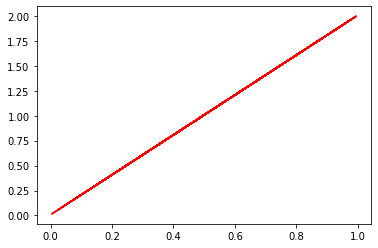

In [18]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

#Downloading the file 


In [19]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>